### *Activate Intellisense*

In [1]:
%config IPCompleter.greedy=True

### *Import Libraries*

In [2]:
import os
import cv2
import dlib
import numpy as np
from math import hypot
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

### *Folder Path*

In [4]:
folderPath_nomask = "./images/no_mask/"
folderPath_mask = "./images/mask/"

### *Load DLIB's Object Detection and Shape Prediction Class*

In [5]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

### *Load Mask Image*

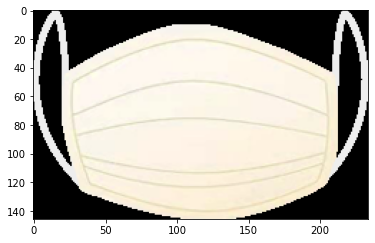

In [6]:
mask_image = cv2.imread("./mask.png")
plt.imshow(mask_image)

### *Function: Add Mask on Face*

In [7]:
def add_mask(frame, out_img):

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(frame_gray)

    for face in faces:
        landmarks = predictor(frame_gray,face)

        top_cord = (landmarks.part(29).x, landmarks.part(29).y)
        left_cord = (landmarks.part(1).x, landmarks.part(1).y)
        right_cord = (landmarks.part(15).x, landmarks.part(15).y)
        center_cord = (landmarks.part(51).x, landmarks.part(51).y)



        c_width = int(hypot(left_cord[0] - right_cord[0] - 5, left_cord[1] - right_cord[1] - 5))
        c_height = int(c_width * 0.80)



        top_left = (int(center_cord[0] - c_width / 2), int(center_cord[1] - c_height / 2))
        bottom_right = (int(center_cord[0] + c_width / 2), int(center_cord[1] + c_height / 2))



        mask_img = cv2.resize(mask_image, (c_width, c_height))
        mask_img_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
        ret,mask_msk = cv2.threshold(mask_img_gray, 25, 255, cv2.THRESH_BINARY_INV)


        mask_area = frame[top_left[1]: top_left[1] + c_height, top_left[0]: top_left[0] + c_width]
        mask_area_msk = cv2.bitwise_and(mask_area, mask_area, mask=mask_msk)
        final_mask = cv2.add(mask_area_msk, mask_img)


        frame[top_left[1]: top_left[1] + c_height, top_left[0]: top_left[0] + c_width] = final_mask
    
    cv2.imwrite(out_img,frame)

### *Loop: Load Images from Folder, Add Mask on Faces*

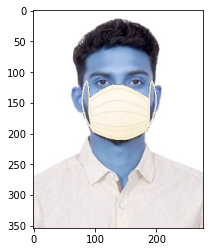

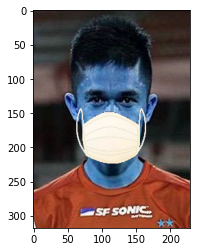

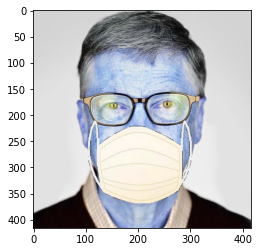

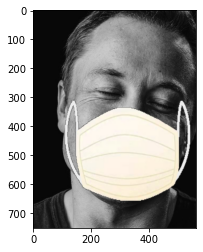

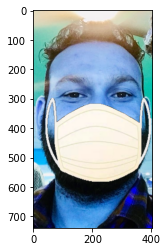

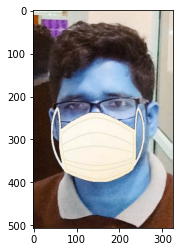

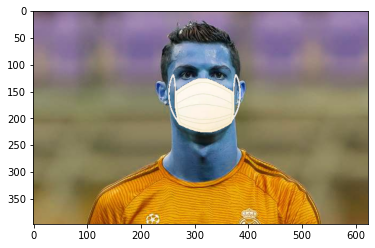

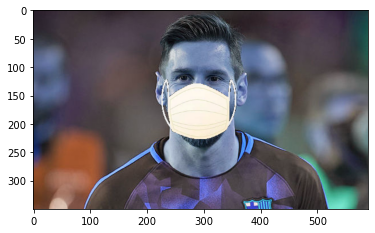

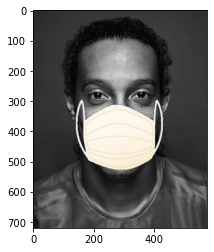

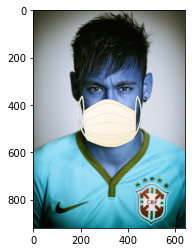

In [11]:
for file in os.listdir("./images/no_mask/"):
    imgPath = folderPath_nomask + file
    out_img = folderPath_mask + file.split("_")[1]
    frame = cv2.imread(imgPath)
    
    add_mask(frame, out_img)
    
    plt.imshow(frame)
    plt.show()

### *Video Stream: Add Musk on Faces*

In [ ]:
stream = cv2.VideoCapture(0)
while True:
    _,frame = stream.read()
    
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(frame_gray)
    
    for face in faces:
        landmarks = predictor(frame_gray,face)
        
        top_cord = (landmarks.part(29).x, landmarks.part(29).y)
        left_cord = (landmarks.part(1).x, landmarks.part(1).y)
        right_cord = (landmarks.part(15).x, landmarks.part(15).y)
        center_cord = (landmarks.part(51).x, landmarks.part(51).y)
        
        
        
        c_width = int(hypot(left_cord[0] - right_cord[0] - 5, left_cord[1] - right_cord[1] - 5))
        c_height = int(c_width * 0.75)
        
        
        
        top_left = (int(center_cord[0] - c_width / 2), int(center_cord[1] - c_height / 2))
        bottom_right = (int(center_cord[0] + c_width / 2), int(center_cord[1] + c_height / 2))
        
        
        
        mask_img = cv2.resize(mask_image, (c_width, c_height))
        mask_img_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
        _,mask_msk = cv2.threshold(mask_img_gray, 25, 255, cv2.THRESH_BINARY_INV)
        
        
        
        mask_area = frame[top_left[1]: top_left[1] + c_height, top_left[0]: top_left[0] + c_width]
        mask_area_msk = cv2.bitwise_and(mask_area, mask_area, mask=mask_msk)
        final_mask = cv2.add(mask_area_msk, mask_img)
        
        
        frame[top_left[1]: top_left[1] + c_height, top_left[0]: top_left[0] + c_width] = final_mask
        
        
        cv2.imshow("Mask area", mask_area)
        cv2.imshow("Mask img msk", mask_msk)
        cv2.imshow("final mask", final_mask)
    
    
    cv2.imshow("Frame", frame)
    
    
    key = cv2.waitKey(1)
    if key==27:
        break
